In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
data = pd.read_csv('G7_cleaned.csv', sep=',').drop(columns=['Unnamed: 0'])

In [130]:
data = data.groupby(['Country Name','Counterpart Country Name'])['2023Q1'].sum()

In [131]:
import networkx as nx

In [132]:
G = nx.Graph()

for i in range(len(data)):
    country = data.index.get_level_values(0)[i]
    counterpart = data.index.get_level_values(1)[i]
    G.add_edge(country, counterpart, weight=data[i])

/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_21929/1194955382.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


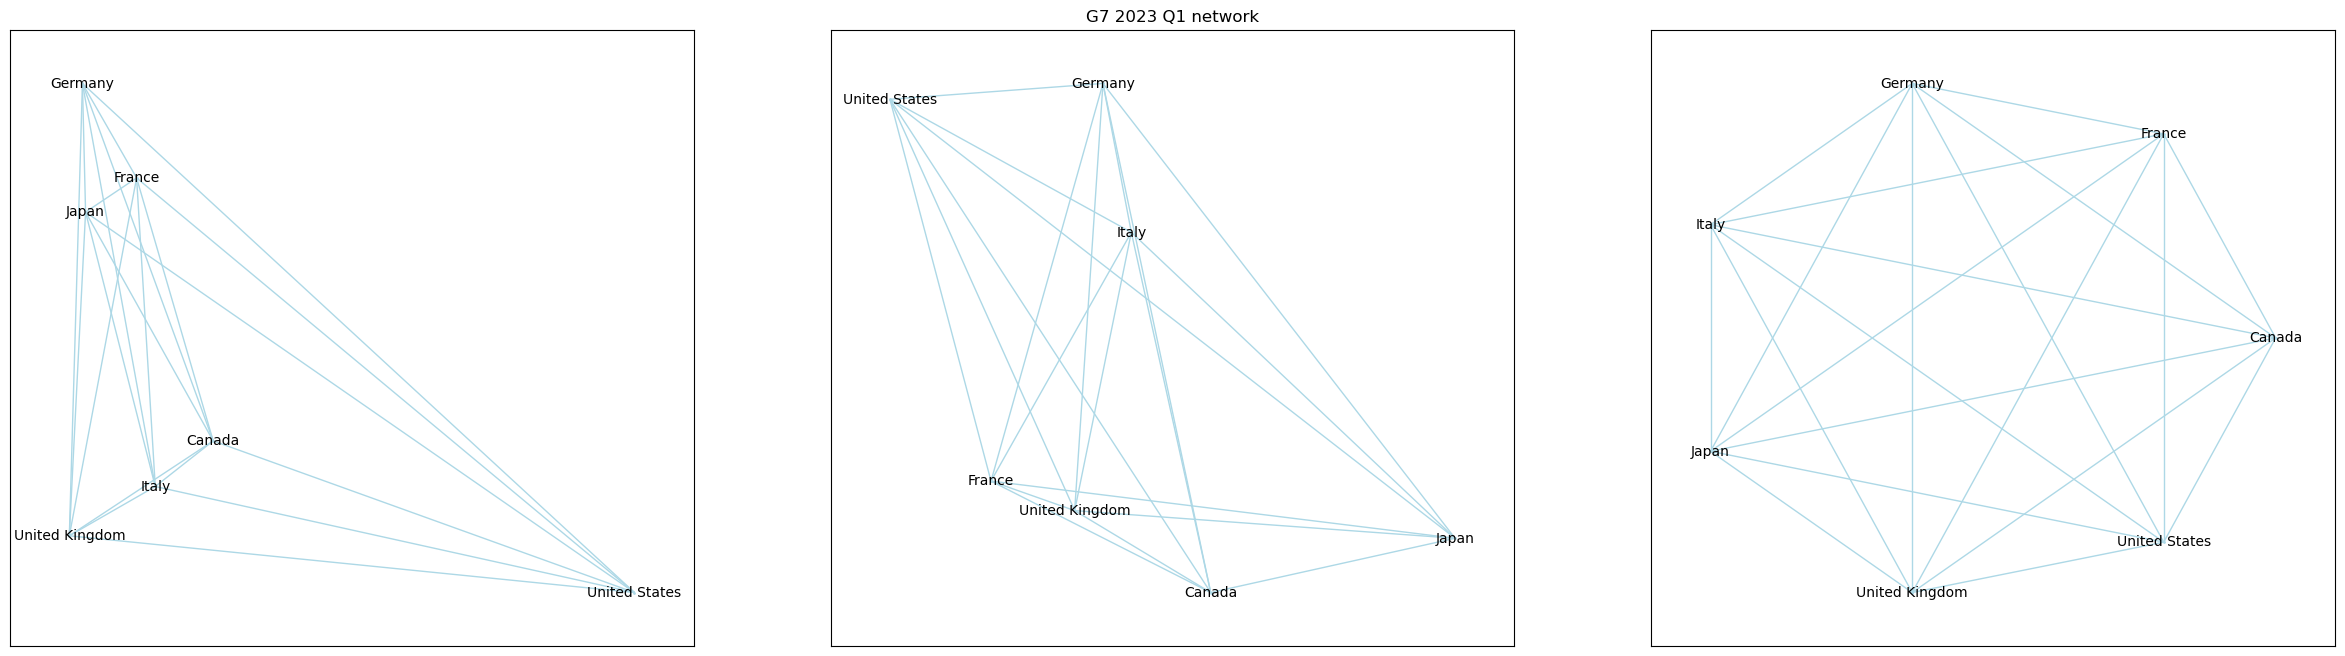

In [133]:
options = {
     'node_color': 'lightblue',
     'edge_color': 'lightblue',
     'node_size': 1,
     'width': 1,
     'alpha': 1.0,
 }

pos=nx.spring_layout(G, seed=50)
plt.subplots(figsize=(30,8))
plt.subplot(131)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=10,**options)

pos=nx.random_layout(G, seed=50)
plt.subplot(132)
plt.title('G7 2023 Q1 network')
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=10,**options)

pos=nx.circular_layout(G)
plt.subplot(133)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=10,**options)
plt.show()